**Name :Suraj Sanjeev Pawar**

**Registration ID :GO-WTP-1839**

**Task-10 : Prediction using Supervised Machine Learning using Decision Tree (Titanic Dataset)**

***Titanic Survival Prediction data set, the main task is to predict whether the passenger will survive or not. The survived column has two values where 0 indicates Not Survived, and 1 indicates Survived.***

***Importing Some Required Libraries*** 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***Importing the Dataset***

In [3]:
titanic_df=pd.read_csv('Titanic.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic_df.shape

(891, 12)

***Seaborn and Matplotlib Data Visualization Libraries***

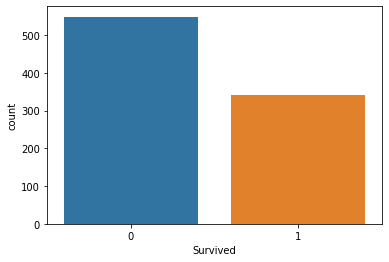

In [5]:
sns.countplot(x='Survived',data=titanic_df)

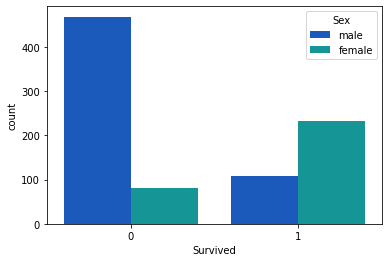

In [6]:
sns.countplot(x='Survived',hue='Sex',data=titanic_df,palette='winter')

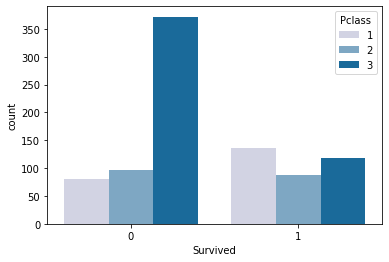

In [7]:
sns.countplot(x='Survived',hue='Pclass',data=titanic_df,palette='PuBu')

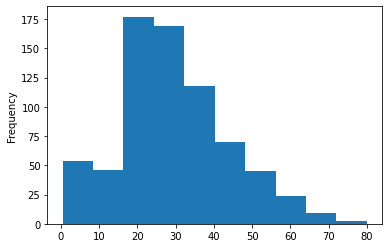

In [8]:
titanic_df['Age'].plot.hist()

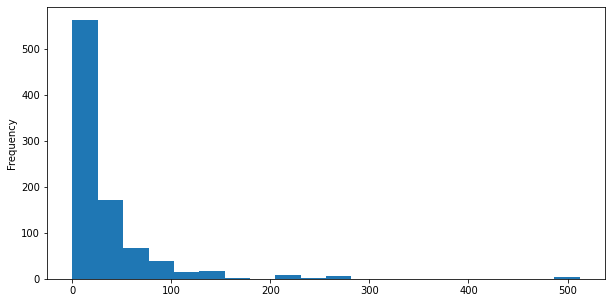

In [9]:
titanic_df['Fare'].plot.hist(bins=20,figsize=(10,5))

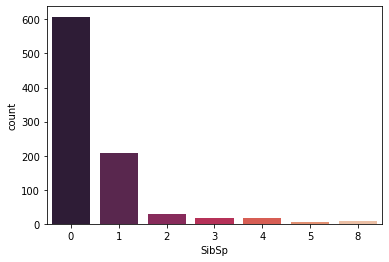

In [10]:
sns.countplot(x='SibSp',data=titanic_df,palette='rocket')

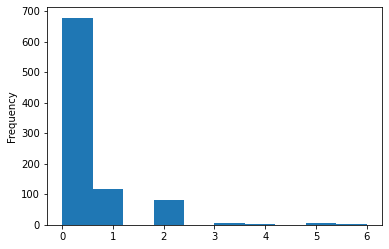

In [11]:
titanic_df['Parch'].plot.hist()

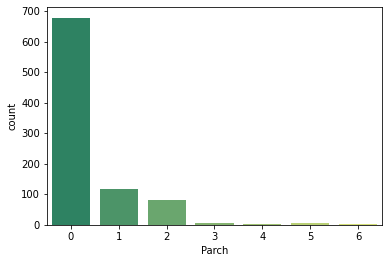

In [12]:
sns.countplot(x='Parch',data=titanic_df,palette='summer')

In [13]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

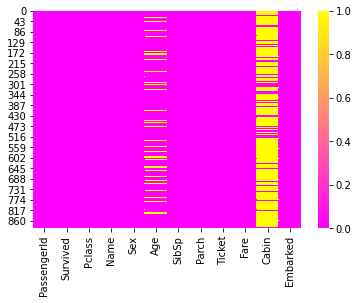

In [14]:
sns.heatmap(titanic_df.isnull(),cmap='spring')

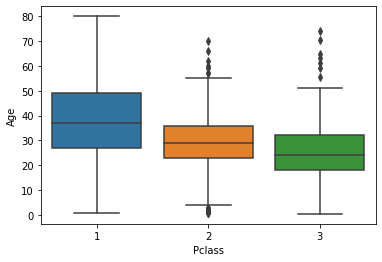

In [15]:
sns.boxplot(x='Pclass',y='Age',data=titanic_df)

***Data Wrangling means Cleaning the data,removing the null Values,
dropping unwanted columnns,adding new ones if needed.***

In [16]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


***Drop unwanted Features***

In [17]:
titanic_df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [18]:
titanic_df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [19]:
inputs = titanic_df.drop('Survived',axis='columns')

In [20]:
target = titanic_df.Survived

In [21]:
inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})

In [22]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [23]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [24]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


***Split train and test datasets***

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2,random_state=1)

In [26]:
len(X_train)

712

In [27]:
len(X_test)

179

***fit the DecisionTree model***

In [29]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [30]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
model.score(X_test,y_test)

0.7486033519553073

In [33]:
y_pred=model.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1])

In [34]:
#Accuray of the model 
from sklearn.metrics import accuracy_score 
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7486033519553073


[Text(170.02061665076337, 212.004, 'X[1] <= 1.5\ngini = 0.47\nsamples = 712\nvalue = [443, 269]'),
 Text(61.46718750000001, 201.132, 'X[2] <= 13.0\ngini = 0.3\nsamples = 463\nvalue = [378, 85]'),
 Text(10.22290076335878, 190.26, 'X[0] <= 2.5\ngini = 0.458\nsamples = 31\nvalue = [11, 20]'),
 Text(7.667175572519085, 179.388, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(12.778625954198475, 179.388, 'X[3] <= 20.825\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(5.11145038167939, 168.516, 'X[2] <= 10.0\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(2.555725190839695, 157.644, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(7.667175572519085, 157.644, 'X[2] <= 11.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(5.11145038167939, 146.772, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(10.22290076335878, 146.772, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(20.44580152671756, 168.516, 'X[2] <= 3.5\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(17.89007633

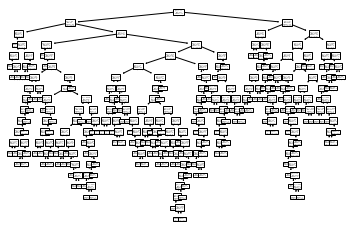

In [35]:
#Tree plotting 

tree.plot_tree(model)

In [36]:
#Decision making in decision tree
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_1 <= 1.50
|   |--- feature_2 <= 13.00
|   |   |--- feature_0 <= 2.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  2.50
|   |   |   |--- feature_3 <= 20.83
|   |   |   |   |--- feature_2 <= 10.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  10.00
|   |   |   |   |   |--- feature_2 <= 11.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_2 >  11.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  20.83
|   |   |   |   |--- feature_2 <= 3.50
|   |   |   |   |   |--- feature_2 <= 2.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_2 >  2.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  3.50
|   |   |   |   |   |--- class: 0
|   |--- feature_2 >  13.00
|   |   |--- feature_0 <= 1.50
|   |   |   |--- feature_3 <= 26.14
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  26.14
|   |   |   |   |--- feature_3 <= 26.47
|   |   |   |   |   |--- class: 1
| 

***Thank you Goeduhub Techonologies***